# 1.A: Basic radioactivity analysis

This is the first tutorial in the TRISEP 2022 Statistics Lectures. 

**Question:** What is the activity of this radioactive source? 

To answer this question, we will pretend to use a detector in the lab that counts the number of decays in a fixed period of time.
The cells below are set up to work through the analysis. Most of the necessary python code is added during the tutorial itself.

In [1]:
# Import modules needed for this tutorial

from trisep.RadiationCounter import RadiationCounter
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background') # only include this if you use a dark background for Jupyter Lab

### Construct the lab detector

In [2]:
lab_detector = RadiationCounter()

Lab radiation counter built. Default counting time is 10.0 seconds.


### Make a measurement:
 - set the timer to 10 seconds
 - insert the radioactive source
 - get the number of decays

In [3]:
lab_detector.set_counting_time(10) # specified in seconds: You will have to wait that long to get the result!
counting_time = lab_detector.get_counting_time() # read back the time to make sure it was set correctly
lab_detector.insert_lab_source() # put the radioactive source into the detector

lab_detector.start() # reset counter and start timer
count = lab_detector.get_count() # get the number of counts

print('In',counting_time,'seconds, the detector recorded',count,'decays')

Please wait 10 seconds...
In 10 seconds, the detector recorded 4 decays


In [4]:
# Estimate the activity from these data

activity = count / counting_time
print('The activity is',activity,'decays per second')

The activity is 0.4 decays per second


### Make several measurements

In [5]:
# Make a python list having the counts from the measurements
counts = []
n_counts = 10000
lab_detector.bypass_wait = True
for _ in range(n_counts):
    lab_detector.start() # reset counter and start timer
    count = lab_detector.get_count() # get the number of counts
    counts.append(count)


### Show a histogram

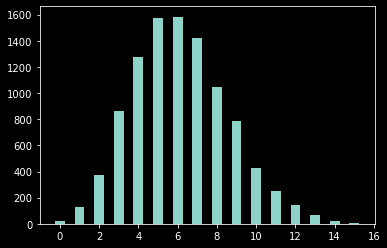

In [6]:
# The following will show how frequently different counts were seen

entries, bin_edges, patches = plt.hist(counts,bins=np.arange(0.,16.,0.5), align='left')
plt.show()

### Summarize your measurements with descriptive statistics

   direc: array([[-0.02340527]])
     fun: 23098.066114776033
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 2
  status: 0
 success: True
       x: array([6.15040003])


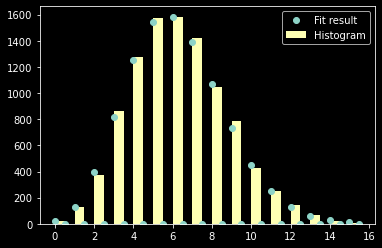

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import factorial
from scipy import stats


def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    """
    The negative log-Likelihood-Function
    """

    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl

def negative_log_likelihood(params, data):
    ''' better alternative using scipy '''
    return -stats.poisson.logpmf(data, params[0]).sum()


data = np.array(counts)


# minimize the negative log-Likelihood

result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )
# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print(result)
parameters = result.x

count_estimate = parameters[0]

# plot poisson-distribution with fitted parameter
x_plot = bin_edges

fit_y = stats.poisson.pmf(x_plot, *parameters)
plt.plot(
    x_plot,
    fit_y * max(entries)/max(fit_y),
    marker='o', linestyle='',
    label='Fit result',
)
plt.hist(
    counts,
    bins=np.arange(0.,16.,0.5),
    label='Histogram',
)

plt.legend()
plt.show()

## Report your findings using typical notation: activity = $\hat{a} \pm \sigma_a$ Bq

In [17]:
activity_estimate = count_estimate / counting_time
stdev = np.std(data / counting_time)
print(activity_estimate, stdev)

0.615040002865875 0.2475394885669759
